In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

Automatically created module for IPython interactive environment


In [3]:
# Dataset based latent variable model
n = 500
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n / 2]
Y_train = Y[:n / 2]
X_test = X[n / 2:]
Y_test = Y[n / 2:]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))


Corr(X)
[[ 1.    0.48  0.06  0.03]
 [ 0.48  1.   -0.03  0.03]
 [ 0.06 -0.03  1.    0.47]
 [ 0.03  0.03  0.47  1.  ]]
Corr(Y)
[[ 1.    0.44 -0.03  0.  ]
 [ 0.44  1.    0.04  0.03]
 [-0.03  0.04  1.    0.48]
 [ 0.    0.03  0.48  1.  ]]


In [5]:
# Canonical(Symmetric) PLS
# Transform data
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

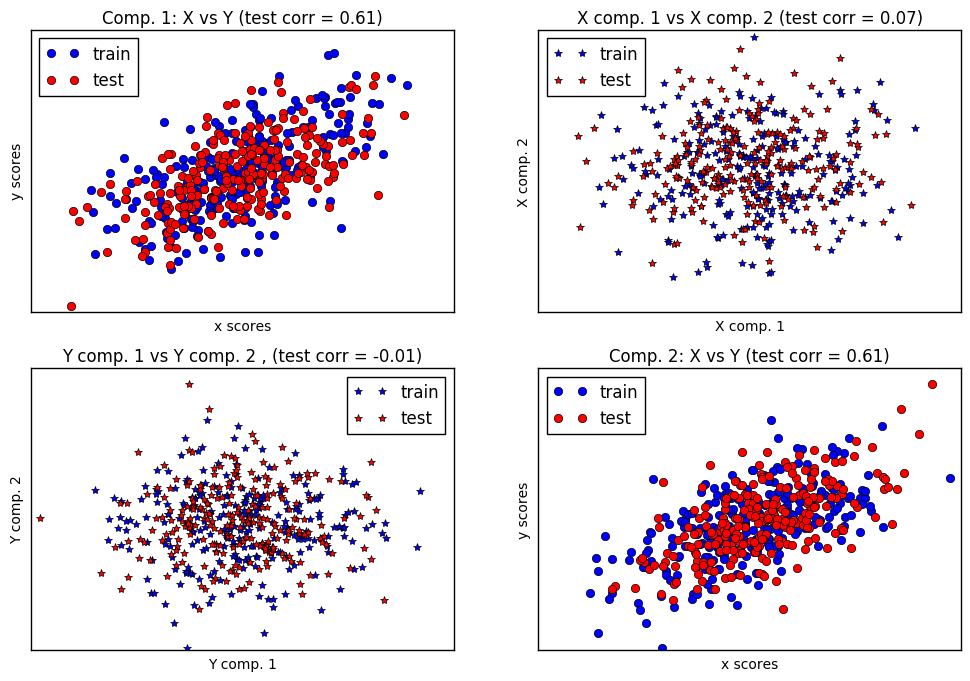

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(X_train_r[:, 0], Y_train_r[:, 0], "ob", label="train")
plt.plot(X_test_r[:, 0], Y_test_r[:, 0], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.plot(X_train_r[:, 1], Y_train_r[:, 1], "ob", label="train")
plt.plot(X_test_r[:, 1], Y_test_r[:, 1], "or", label="test")
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.plot(X_train_r[:, 0], X_train_r[:, 1], "*b", label="train")
plt.plot(X_test_r[:, 0], X_test_r[:, 1], "*r", label="test")
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.plot(Y_train_r[:, 0], Y_train_r[:, 1], "*b", label="train")
plt.plot(Y_test_r[:, 0], Y_test_r[:, 1], "*r", label="test")
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()